In [ ]:
# importing the dependencies
import pandas as pd
import numpy as np
import seaborn as sns  # for visualizing the data
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # for training and testing the data
from sklearn.preprocessing import MinMaxScaler  # to scale the features
from sklearn.preprocessing import StandardScaler  # for performing data standardization
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes model
from sklearn.metrics import accuracy_score  # to find the accuracy of each model
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# Read the crop data from CSV file
crop_data = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')

In [ ]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


This is a classification problem. in classfication problem we have our lables(output variable) in a categorial form. whereas in Regression problem we have out labels in numerical form

Therefore we will be using classification Algorithum

now importing all the classification models

N => Nitrogen

K => Potassium

p => Phophorus

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score  #to find the accuracy of each model

Among the following classifier models we will select the best model for our project based on the accuracy

In [ ]:
crop_data.shape

(2200, 8)

In [ ]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


All of the features are integer except the Last Label column . IT is of object datatype. Therefore we will have to encode it as it is our output variable.

Checking the null value

In [ ]:
crop_data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


We do nto have any null values so our dataset is clean

In [ ]:
crop_data.duplicated().sum()

0

Therefore we do not have any duplicate value

Getting statistatical method of our dataset

In [ ]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


%=> are percentile

i.e less than 21 values in the nitrogen column are 25%

37 se kam values are 50%

84.2 se kam values are 75%

Now Exploring the data to find the Correlation

In [ ]:
#using pandas correlation feature
corr = crop_data.corr()
corr

ValueError: could not convert string to float: 'rice'

Correlation gives us a heat map

Every features have a positive correaltion with themselves. Now for better undrstanding plooting the correlation plot using seaborn

<Axes: >

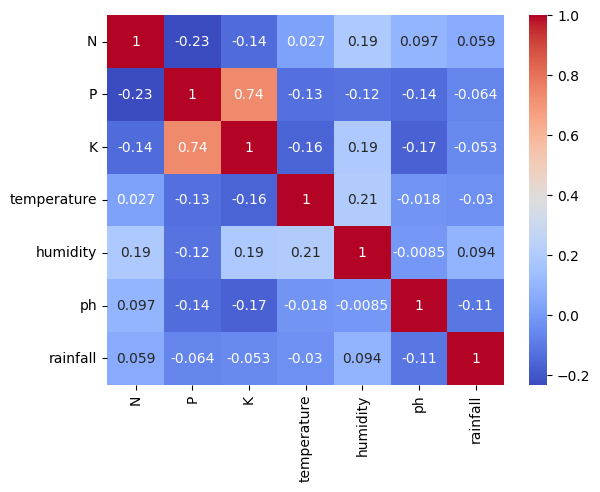

In [ ]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')
#we can also use 'plasma' insted of 'coolwarm'
#cbar is the bar with appears at the side of the plot
#dark red represents positive correltion whereas dark blue represents negative correlation

WE can see that every column has a positive correlation with itself . Therefore the diagonal is positive

as we can see potassium(K) has a positive correlation with phosphorus(p) i.e 0.74

In [ ]:
crop_data['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


as we can see there are multiple labels in the last label column so we will need to encode them

<ipython-input-18-e497b2215ff1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_data['N'])


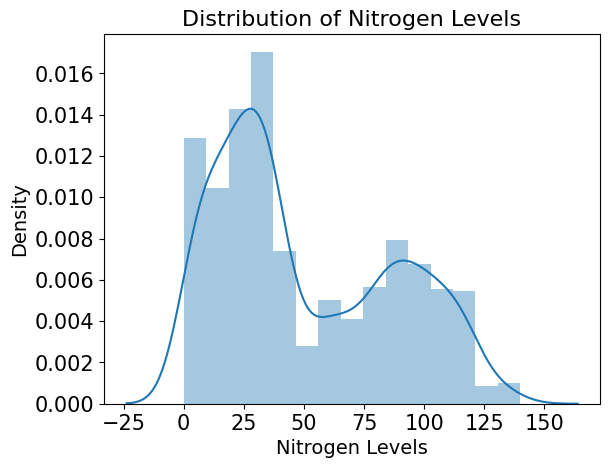

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming crop_data['N'] is your data column
sns.distplot(crop_data['N'])

# Add axis labels and title with larger font sizes
plt.xlabel("Nitrogen Levels", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of Nitrogen Levels", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Show the plot
plt.show()


<ipython-input-12-ca875cd58d76>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_data['N'])


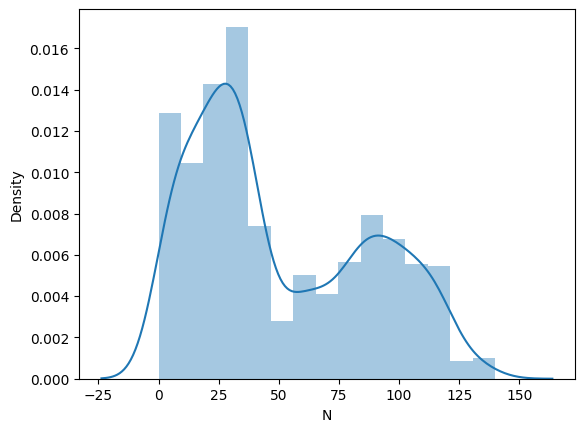

In [ ]:
sns.distplot(crop_data['N'])
plt.show()

As we can see that the distribution of the values of Nitrogen between 25 and 50 is max

some distributions are also present in between 75 and 125

Encoding:- Converting the categorial variables into numbers as machine do not understand catogreial data

i.e we have to convert the data of the output column ie the label column into numerical values

So we will create a dictionary and pass all the values of the label column into that dictionary and convert them according to their values

<ipython-input-18-dfeb768c0681>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_data[column], ax=axes[i])
<ipython-input-18-dfeb768c0681>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_data[column], ax=axes[i])
<ipython-input-18-dfeb768c0681>:12: UserWarning: 

`distplot` is a dep

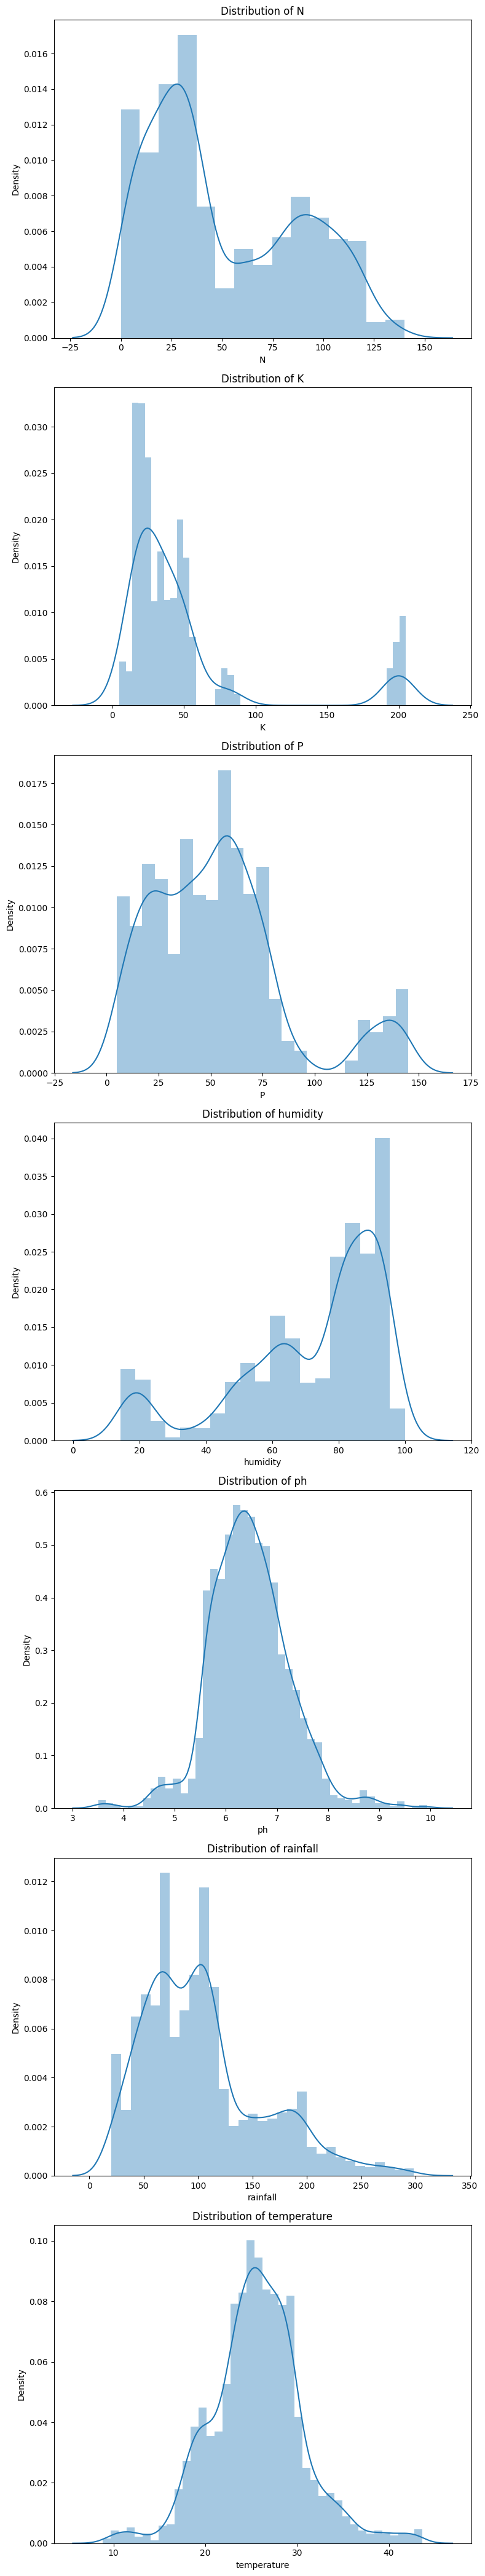

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming crop_data contains columns 'N', 'K', 'P', 'humidity', 'ph', 'rainfall'
columns_to_plot = ['N', 'K', 'P', 'humidity', 'ph', 'rainfall','temperature']

# Create subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 6 * len(columns_to_plot)))

# Plotting multiple distributions
for i, column in enumerate(columns_to_plot):
    sns.distplot(crop_data[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)  # Add this line to set xlabel

plt.tight_layout()
plt.show()


<ipython-input-20-a68279633327>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_data['K'])


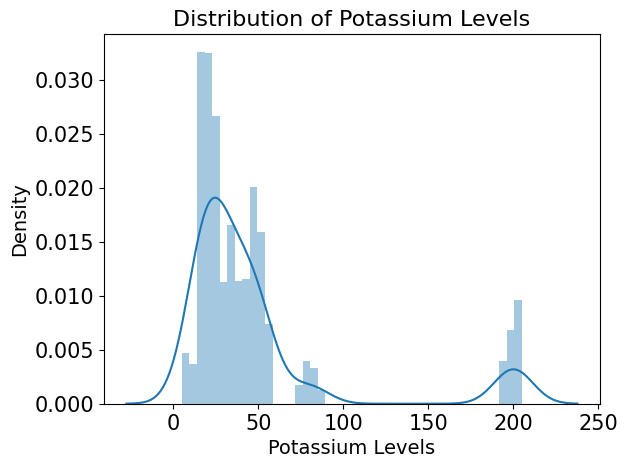

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming crop_data['N'] is your data column
sns.distplot(crop_data['K'])

# Add axis labels and title with larger font sizes
plt.xlabel("Potassium Levels", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of Potassium Levels", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Show the plot
plt.show()


<ipython-input-21-f0c4b5eaa474>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_data['P'])


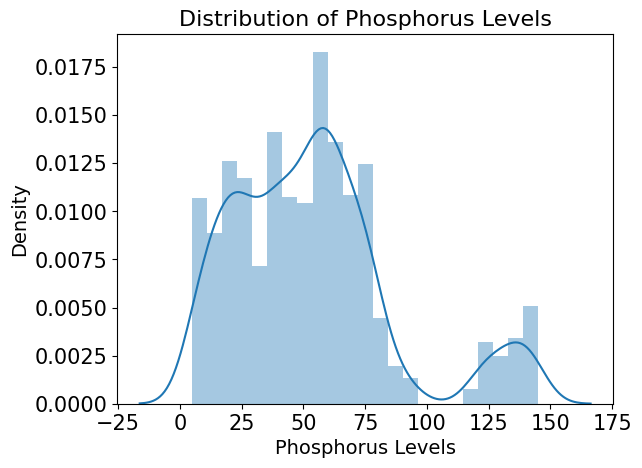

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming crop_data['N'] is your data column
sns.distplot(crop_data['P'])

# Add axis labels and title with larger font sizes
plt.xlabel("Phosphorus Levels", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of Phosphorus Levels", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Show the plot
plt.show()


<ipython-input-22-f17d54e5f758>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_data['humidity'])


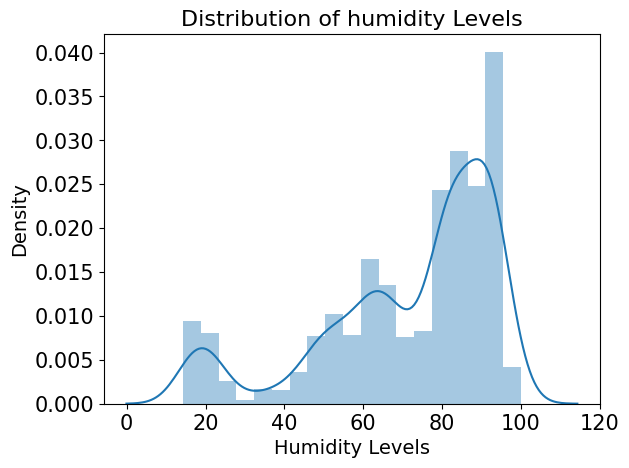

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming crop_data['N'] is your data column
sns.distplot(crop_data['humidity'])

# Add axis labels and title with larger font sizes
plt.xlabel("Humidity Levels", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of humidity Levels", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Show the plot
plt.show()


<ipython-input-23-35560009dd70>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_data['ph'])


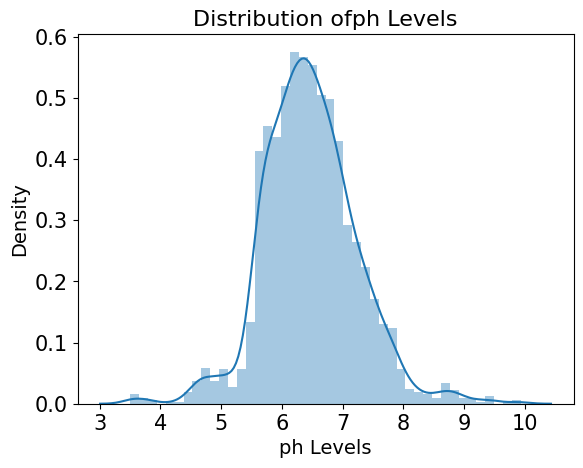

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming crop_data['N'] is your data column
sns.distplot(crop_data['ph'])

# Add axis labels and title with larger font sizes
plt.xlabel("ph Levels", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution ofph Levels", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Show the plot
plt.show()


<ipython-input-24-17c1a7731f72>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_data['rainfall'])


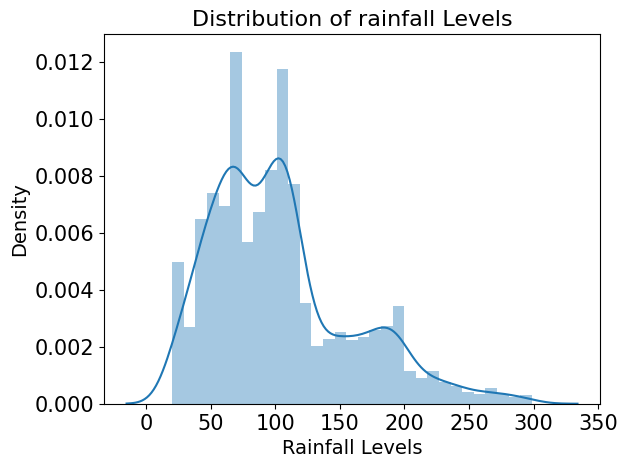

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming crop_data['N'] is your data column
sns.distplot(crop_data['rainfall'])

# Add axis labels and title with larger font sizes
plt.xlabel("Rainfall Levels", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of rainfall Levels", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Show the plot
plt.show()


<ipython-input-25-a2eddd1f45c4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_data['temperature'])


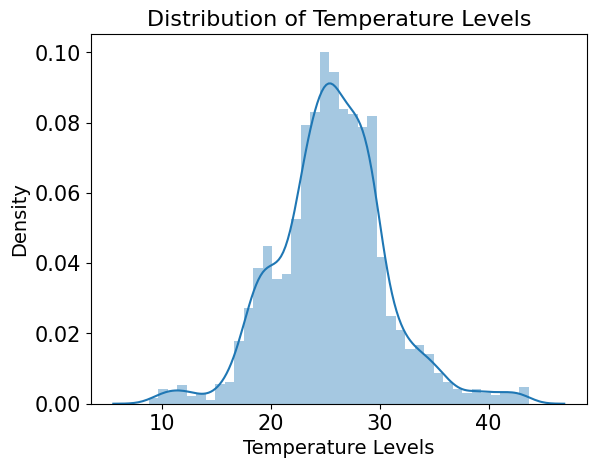

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming crop_data['N'] is your data column
sns.distplot(crop_data['temperature'])

# Add axis labels and title with larger font sizes
plt.xlabel("Temperature Levels", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of Temperature Levels", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Show the plot
plt.show()


In [ ]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop_data['crop_num']=crop_data['label'].map(crop_dict)  #mapping the labels with the crop dictinoary and storing them into new column

In [ ]:
crop_data['crop_num'].value_counts()

,count
crop_num,
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100
9,100


Now as we can see that all the 22 crops were mapped to their respective dictionary numbers

Now we have no need for the label column in our dataset so we will be dropping it

In [ ]:
# Map the labels to numbers and create a 'crop_num' column
crop_data['crop_num'] = crop_data['label'].map(crop_dict)

In [ ]:
# Drop the 'label' column
crop_data.drop('label', axis=1, inplace=True)


In [ ]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


As we can see that our label column was dropped

Now Trainig and testing the data

Passing our input features to X and giving the output labels to Y

In [ ]:
# Separate features (x) and labels (y)
x = crop_data.drop('crop_num', axis=1)
y = crop_data['crop_num']

In [ ]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Creating 4 arrays x_train,x_test,y_train,y_test.

taking 20% data as the test data.i.e 80% data is the training data

In [ ]:
x.shape

(2200, 7)

In [ ]:
x_train.shape

(1760, 7)

In [ ]:
x_test.shape

(440, 7)

In [ ]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Loop through the models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calculate and print accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Rename the variable to avoid conflict with the function
    f1_value = f1_score(y_test, y_pred, average='weighted')

    print(f"{name}:")
    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1-Score: {:.4f}".format(f1_value))
    print("\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.9455
Precision: 0.9466
Recall: 0.9455
F1-Score: 0.9450


Decision Tree:
Accuracy: 0.9841
Precision: 0.9845
Recall: 0.9841
F1-Score: 0.9841


Gaussian Naive Bayes:
Accuracy: 0.9955
Precision: 0.9958
Recall: 0.9955
F1-Score: 0.9954


Support Vector Machine:
Accuracy: 0.9614
Precision: 0.9673
Recall: 0.9614
F1-Score: 0.9612


K Nearest Neighbors:
Accuracy: 0.9705
Precision: 0.9740
Recall: 0.9705
F1-Score: 0.9703


Random Forest:
Accuracy: 0.9932
Precision: 0.9937
Recall: 0.9932
F1-Score: 0.9932


Bagging Classifier:
Accuracy: 0.9886
Precision: 0.9888
Recall: 0.9886
F1-Score: 0.9887


Gradient Boosting:
Accuracy: 0.9818
Precision: 0.9843
Recall: 0.9818
F1-Score: 0.9819




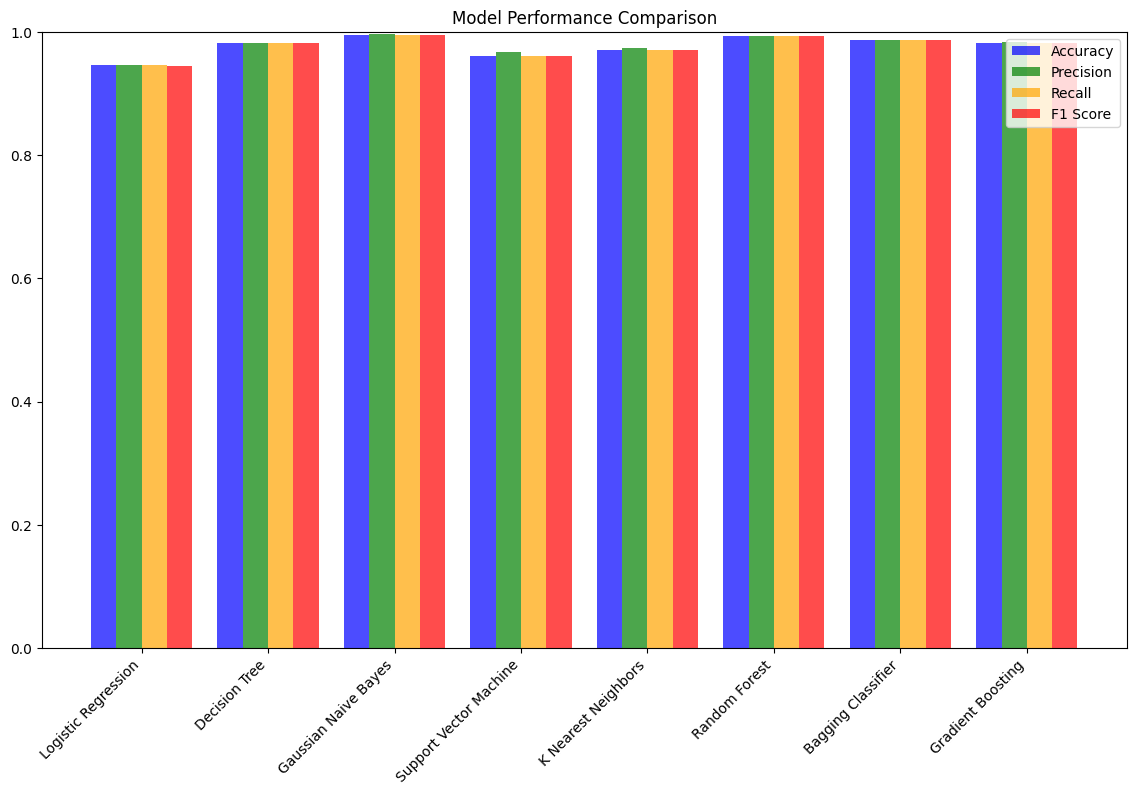

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace this with your actual data)
models = ['Logistic Regression', 'Decision Tree', 'Gaussian Naive Bayes', 'Support Vector Machine',
          'K Nearest Neighbors', 'Random Forest', 'Bagging Classifier', 'Gradient Boosting']

accuracy = [0.9455, 0.9818, 0.9955, 0.9614, 0.9705, 0.9932, 0.9864, 0.9818]
precision = [0.9466, 0.9824, 0.9958, 0.9673, 0.9740, 0.9937, 0.9867, 0.9843]
recall = [0.9455, 0.9818, 0.9955, 0.9614, 0.9705, 0.9932, 0.9864, 0.9818]
f1_score = [0.9450, 0.9818, 0.9954, 0.9612, 0.9703, 0.9932, 0.9864, 0.9819]

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.2
index = np.arange(len(models))

# Accuracy
ax.bar(index, accuracy, width=bar_width, label='Accuracy', color='blue', alpha=0.7)
# Precision
ax.bar(index + bar_width, precision, width=bar_width, label='Precision', color='green', alpha=0.7)
# Recall
ax.bar(index + 2 * bar_width, recall, width=bar_width, label='Recall', color='orange', alpha=0.7)
# F1 Score
ax.bar(index + 3 * bar_width, f1_score, width=bar_width, label='F1 Score', color='red', alpha=0.7)

ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models, rotation=45, ha='right')

ax.set_ylim([0, 1])
ax.set_title('Model Performance Comparison')
ax.legend()

# Show the plot
plt.show()


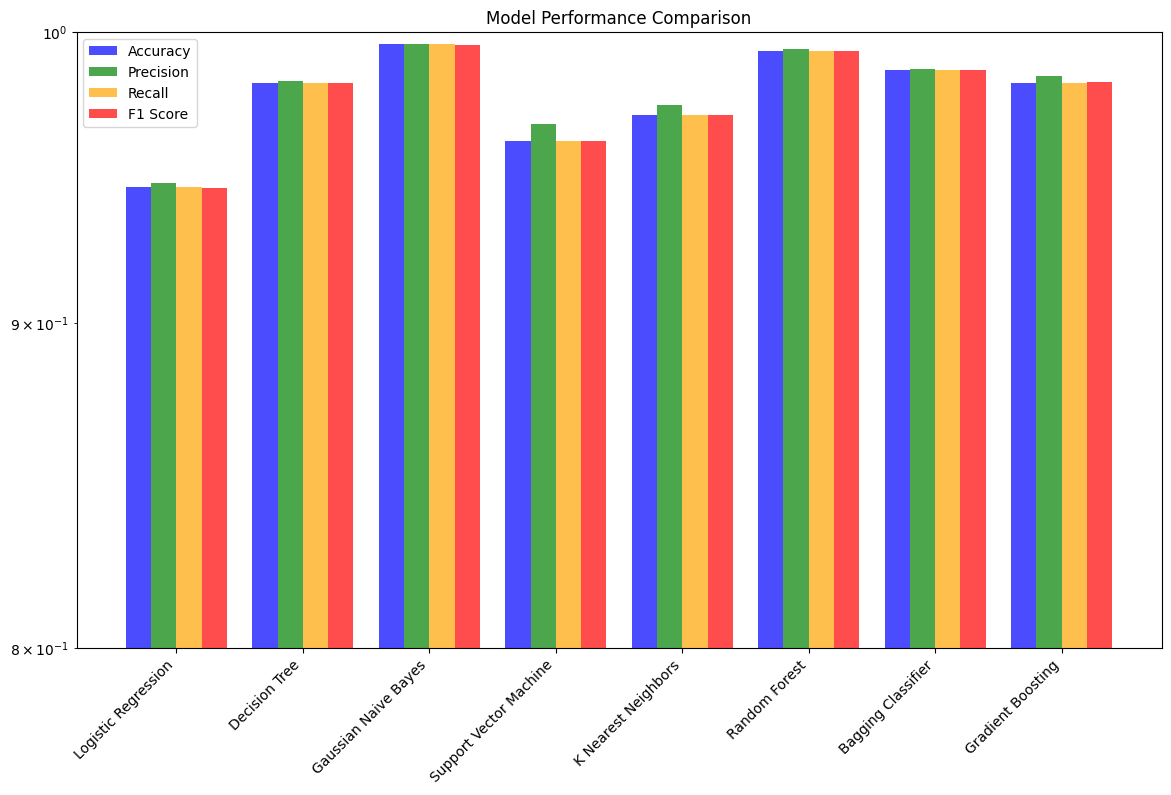

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace this with your actual data)
models = ['Logistic Regression', 'Decision Tree', 'Gaussian Naive Bayes', 'Support Vector Machine',
          'K Nearest Neighbors', 'Random Forest', 'Bagging Classifier', 'Gradient Boosting']

accuracy = [0.9455, 0.9818, 0.9955, 0.9614, 0.9705, 0.9932, 0.9864, 0.9818]
precision = [0.9466, 0.9824, 0.9958, 0.9673, 0.9740, 0.9937, 0.9867, 0.9843]
recall = [0.9455, 0.9818, 0.9955, 0.9614, 0.9705, 0.9932, 0.9864, 0.9818]
f1_score = [0.9450, 0.9818, 0.9954, 0.9612, 0.9703, 0.9932, 0.9864, 0.9819]

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.2
index = np.arange(len(models))

# Accuracy
ax.bar(index, accuracy, width=bar_width, label='Accuracy', color='blue', alpha=0.7)
# Precision
ax.bar(index + bar_width, precision, width=bar_width, label='Precision', color='green', alpha=0.7)
# Recall
ax.bar(index + 2 * bar_width, recall, width=bar_width, label='Recall', color='orange', alpha=0.7)
# F1 Score
ax.bar(index + 3 * bar_width, f1_score, width=bar_width, label='F1 Score', color='red', alpha=0.7)

ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models, rotation=45, ha='right')

ax.set_yscale('log')  # Set y-axis to logarithmic scale
ax.set_ylim([0.8, 1])  # Adjust the y-axis limits accordingly

ax.set_title('Model Performance Comparison')
ax.legend()

# Show the plot
plt.show()


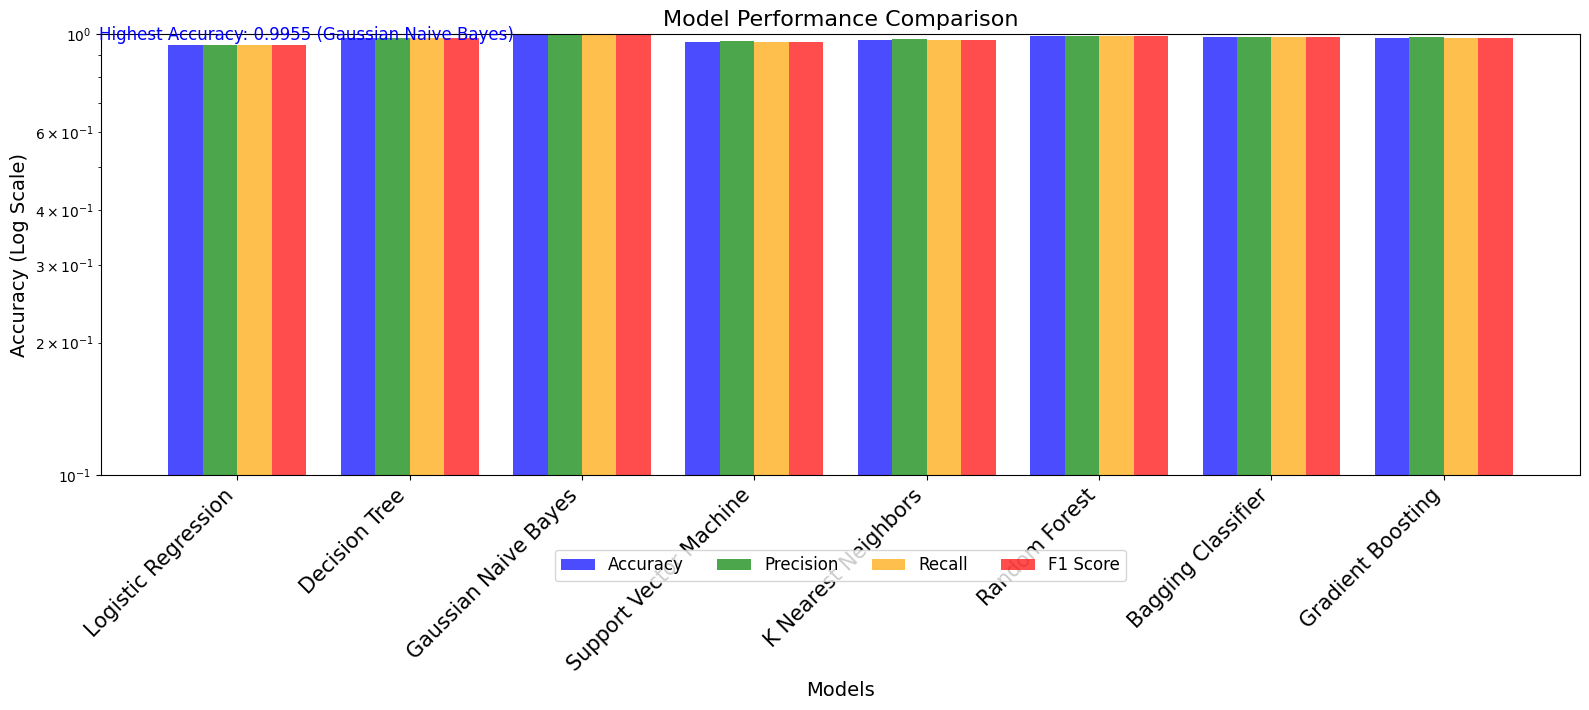

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace this with your actual data)
models = ['Logistic Regression', 'Decision Tree', 'Gaussian Naive Bayes', 'Support Vector Machine',
          'K Nearest Neighbors', 'Random Forest', 'Bagging Classifier', 'Gradient Boosting']

accuracy = [0.9455, 0.9818, 0.9955, 0.9614, 0.9705, 0.9932, 0.9864, 0.9818]
precision = [0.9466, 0.9824, 0.9958, 0.9673, 0.9740, 0.9937, 0.9867, 0.9843]
recall = [0.9455, 0.9818, 0.9955, 0.9614, 0.9705, 0.9932, 0.9864, 0.9818]
f1_score = [0.9450, 0.9818, 0.9954, 0.9612, 0.9703, 0.9932, 0.9864, 0.9819]

# Plotting
fig, ax = plt.subplots(figsize=(16, 9))  # Adjust figure size

bar_width = 0.2
index = np.arange(len(models))

# Accuracy
ax.bar(index, accuracy, width=bar_width, label='Accuracy', color='blue', alpha=0.7)
# Precision
ax.bar(index + bar_width, precision, width=bar_width, label='Precision', color='green', alpha=0.7)
# Recall
ax.bar(index + 2 * bar_width, recall, width=bar_width, label='Recall', color='orange', alpha=0.7)
# F1 Score
ax.bar(index + 3 * bar_width, f1_score, width=bar_width, label='F1 Score', color='red', alpha=0.7)

# Setting x-ticks and labels
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=15)  # Increase font size of x-ticks

# Set y-axis to logarithmic scale and limit
ax.set_yscale('log')
ax.set_ylim([0.8, 1])

# Customize Y-axis labels to show powers of 10 for accuracy
ax.set_yticks([10 ** -1, 10 ** 0])  # Example power of 10 ticks (customize as needed)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"$10^{{{int(np.log10(x))}}}$"))

# Add axis labels and title
ax.set_xlabel('Models', fontsize=14)  # Increase font size of x-axis label
ax.set_ylabel('Accuracy (Log Scale)', fontsize=14)  # Show only accuracy on Y-axis
ax.set_title('Model Performance Comparison', fontsize=16)  # Increase font size of title

# Highlight the highest accuracy model
max_accuracy = max(accuracy)
max_model = models[accuracy.index(max_accuracy)]
ax.text(-0.5, max_accuracy, f'Highest Accuracy: {max_accuracy:.4f} ({max_model})',
        fontsize=12, color='blue', ha='left', va='center')

# Add legend below the plot
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

# Adjust layout
plt.tight_layout(rect=[0, 0.2, 1, 1])  # Prevent clipping of labels and legend
plt.show()


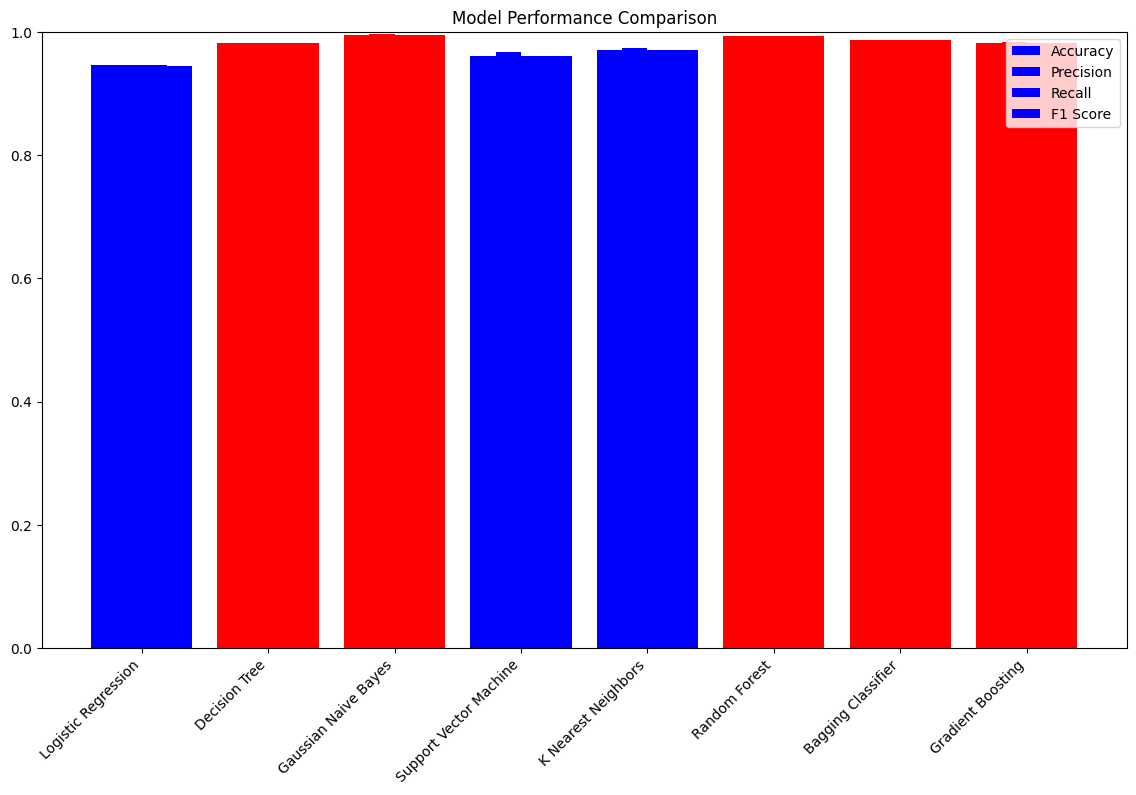

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example data (replace this with your actual data)
models = ['Logistic Regression', 'Decision Tree', 'Gaussian Naive Bayes', 'Support Vector Machine',
          'K Nearest Neighbors', 'Random Forest', 'Bagging Classifier', 'Gradient Boosting']

accuracy = [0.9455, 0.9818, 0.9955, 0.9614, 0.9705, 0.9932, 0.9864, 0.9818]
precision = [0.9466, 0.9824, 0.9958, 0.9673, 0.9740, 0.9937, 0.9867, 0.9843]
recall = [0.9455, 0.9818, 0.9955, 0.9614, 0.9705, 0.9932, 0.9864, 0.9818]
f1_score = [0.9450, 0.9818, 0.9954, 0.9612, 0.9703, 0.9932, 0.9864, 0.9819]

# Calculate the mean value for each metric
mean_values = np.mean([accuracy, precision, recall, f1_score], axis=0)

# Determine a threshold (e.g., mean value) to differentiate colors
threshold = np.mean(mean_values)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.2
index = np.arange(len(models))

# Use seaborn color palette with a diverging colormap
colors = sns.color_palette("RdBu_r", len(models))

# Function to assign colors based on the threshold
def assign_color(value):
    return "red" if value >= threshold else "blue"

# Accuracy
ax.bar(index, accuracy, width=bar_width, label='Accuracy', color=[assign_color(value) for value in accuracy])
# Precision
ax.bar(index + bar_width, precision, width=bar_width, label='Precision', color=[assign_color(value) for value in precision])
# Recall
ax.bar(index + 2 * bar_width, recall, width=bar_width, label='Recall', color=[assign_color(value) for value in recall])
# F1 Score
ax.bar(index + 3 * bar_width, f1_score, width=bar_width, label='F1 Score', color=[assign_color(value) for value in f1_score])

ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models, rotation=45, ha='right')

ax.set_ylim([0, 1])  # Adjust the y-axis limits accordingly

ax.set_title('Model Performance Comparison')
ax.legend()

# Show the plot
plt.show()


Scale the features using MinMaxScaler

It is used to transform features by scaling each feature to a given range.i.e it brings all the features into to a specific range. MInMaxScaler brings all features individually into a specific range

creating a object to use MinMaxScler

Performing data standardizartion

creating the object of StandardScalar

In [ ]:
# Scale the features using Min-Max scaling
ms = MinMaxScaler()
x_train = ms.fit_transform(x_train)
x_test = ms.transform(x_test)

# Standardize the scaled features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

Now the entire dataset has came into one range. MInmaxScaler operates on column individually whereas standardScaler operates on the entire dataset

MinMaxScaler(feature_range = (0, 1)) will transform each value in the column proportionally within the range [0,1]. Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).

StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. Use StandardScaler if you know the data distribution is normal.

In [ ]:
# Create a Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Make predictions on the test data
y_pred = gnb.predict(x_test)

In [ ]:
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:{}%".format(accuracy * 100))

Accuracy:99.54545454545455%


In [ ]:
# Define a function for crop recommendation
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    # Create a numpy array with the input parameters
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

    # Transform the features using Min-Max scaling and standardization
    transformed_features = ms.transform(features)
    transformed_features = sc.transform(transformed_features)

    # Predict the crop number using the trained Gaussian Naive Bayes model
    prediction = gnb.predict(transformed_features).reshape(1, -1)

    return prediction[0]



In [ ]:
# Input values for recommendation
N = 80
P = 40
K = 40
temperature = 20.0
humidity = 80
ph = 6.5
rainfall = 200
crop_dict = {
    1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
    8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
    14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
    19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
}
# Get crop recommendation
predict = recommendation(N, P, K, temperature, humidity, ph, rainfall)
final_pred=(int(predict))
# Check if the predicted crop number is in the range [1, 22]
if 1 <= final_pred <= 22:
    suitable_crop = crop_dict[final_pred]  # Extract the scalar value and convert it to int
    print('{} is the best crop to be cultivated'.format(suitable_crop))
else:
    print("Sorry, we are not able to recommend a proper crop for this environment")

Rice is the best crop to be cultivated


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


**Complte code using gaussian naive bayes**

In [ ]:
# importing the dependencies
import pandas as pd
import numpy as np
import seaborn as sns  # for visualizing the data
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # for training and testing the data
from sklearn.preprocessing import MinMaxScaler  # to scale the features
from sklearn.preprocessing import StandardScaler  # for performing data standardization
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes model
from sklearn.metrics import accuracy_score  # to find the accuracy of each model

# Read the crop data from CSV file
crop_data = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')

# Define a dictionary to map crop labels to numbers
crop_dict = {
    'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5, 'papaya': 6, 'orange': 7, 'apple': 8,
    'muskmelon': 9, 'watermelon': 10, 'grapes': 11, 'mango': 12, 'banana': 13, 'pomegranate': 14,
    'lentil': 15, 'blackgram': 16, 'mungbean': 17, 'mothbeans': 18, 'pigeonpeas': 19, 'kidneybeans': 20,
    'chickpea': 21, 'coffee': 22
}

# Map the labels to numbers and create a 'crop_num' column
crop_data['crop_num'] = crop_data['label'].map(crop_dict)

# Drop the 'label' column
crop_data.drop('label', axis=1, inplace=True)

# Separate features (x) and labels (y)
x = crop_data.drop('crop_num', axis=1)
y = crop_data['crop_num']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the features using Min-Max scaling
ms = MinMaxScaler()
x_train = ms.fit_transform(x_train)
x_test = ms.transform(x_test)

# Standardize the scaled features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Create a Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(x_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:{}%".format(accuracy * 100))

# Define a function for crop recommendation
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    # Create a numpy array with the input parameters
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

    # Transform the features using Min-Max scaling and standardization
    transformed_features = ms.transform(features)
    transformed_features = sc.transform(transformed_features)

    # Predict the crop number using the trained Gaussian Naive Bayes model
    prediction = gnb.predict(transformed_features).reshape(1, -1)

    return prediction[0]

# Input values for recommendation
N = 71
P = 54
K = 16
temperature = 22.0
humidity = 60
ph = 5.5
rainfall = 90
crop_dict = {
    1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
    8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
    14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
    19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
}
# Get crop recommendation
predict = recommendation(N, P, K, temperature, humidity, ph, rainfall)
final_pred=(int(predict))
# Check if the predicted crop number is in the range [1, 22]
if 1 <= final_pred <= 22:
    suitable_crop = crop_dict[final_pred]  # Extract the scalar value and convert it to int
    print('{} is the best crop to be cultivated'.format(suitable_crop))
else:
    print("Sorry, we are not able to recommend a proper crop for this environment")


Accuracy:99.54545454545455%
Maize is the best crop to be cultivated


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


**Complete code using random forest**

In [ ]:
#importing the dependencies
import pandas as pd
import numpy as np
import seaborn as sns # for visualizing the data
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # for training and testing the data
from sklearn.preprocessing import MinMaxScaler # to scale the features
from sklearn.preprocessing import StandardScaler # for performing data standardization
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  # to find the accuracy of each model

# Read the crop data from CSV file
crop_data = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')

# Define a dictionary to map crop labels to numbers
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

# Map the labels to numbers and create a 'crop_num' column
crop_data['crop_num'] = crop_data['label'].map(crop_dict)

# Drop the 'label' column
crop_data.drop('label', axis=1, inplace=True)

# Separate features (x) and labels (y)
x = crop_data.drop('crop_num', axis=1)
y = crop_data['crop_num']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the features using Min-Max scaling
ms = MinMaxScaler()
x_train = ms.fit_transform(x_train)
x_test = ms.transform(x_test)

# Standardize the scaled features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Create a RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(x_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:{}%".format(accuracy*100))

# Define a function for crop recommendation
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    # Create a numpy array with the input parameters
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

    # Transform the features using Min-Max scaling and standardization
    transformed_features = ms.transform(features)
    transformed_features = sc.transform(transformed_features)

    # Predict the crop number using the trained RandomForestClassifier
    prediction = rfc.predict(transformed_features).reshape(1, -1)

    return prediction[0]

# Input values for recommendation
N = 80
P = 40
K = 40
temperature = 20.0
humidity = 80
ph = 6.5
rainfall = 200

# Map crop numbers to crop names
crop_dict = {
    1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
    8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
    14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
    19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
}

# Get crop recommendation
predict = recommendation(N, P, K, temperature, humidity, ph, rainfall)
print(predict)
# Check if the predicted crop number is in the range [1, 22]
if 1 <= predict <= 22:
    suitable_crop = crop_dict[int(predict)]  # Extract the scalar value and convert it to int
    print('{} is the best crop to be cultivated'.format(suitable_crop))
else:
    print("Sorry, we are not able to recommend a proper crop for this environment")


Accuracy:99.31818181818181%
[1]
Rice is the best crop to be cultivated


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
